In [261]:
# Lamp coordinates (x,y)
l = [
4.2  20.4
17 21.2
22.4 17.2
5.5 12.2
12.2 9.8
15.2 13.8
21.5 10.5
3.9 3.2
13.2 4.2
20.4 4.2    
]

# Lamp heights
h = [4, 3.5, 6, 4, 4, 6, 5.5, 5, 5, 4.5];

In [277]:
# Construct matrix A
n = 25
n_lamps = length(h)

x=Array(0.5.+0:n)'
y=Array(0.5.+0:n)

X = repeat(x,n)
Y = Matrix(X')

A = zeros(n*n,n_lamps);
for j in 1:n_lamps
    dist_sq = ( (X .- l[j,1] ).^2 + (Y.-l[j,2]).^2 .+ h[j]^2 )
    ill = 1 ./ dist_sq
    A[:,j] = reshape(ill,(n*n,1))
end

avg_A = sum(A)/(n*n)
A = A / avg_A;

In [278]:
A


625×10 Matrix{Float64}:
 0.0245717  0.0146708  0.0131657  …  0.238544   0.052306   0.0243288
 0.0270358  0.0155521  0.0137254     0.26515    0.0540353  0.0246964
 0.0298776  0.0164937  0.0142957     0.282325   0.0552921  0.0249556
 0.0331752  0.017498   0.014873      0.285407   0.0560025  0.0250994
 0.0370271  0.0185665  0.015453      0.273468   0.0561227  0.0251235
 0.041558   0.0196993  0.0160309  …  0.249944   0.055645   0.0250273
 0.0469276  0.0208957  0.0166008     0.220446   0.0545994  0.0248136
 0.0533409  0.0221524  0.0171562     0.190012   0.0530488  0.0244883
 0.0610634  0.0234643  0.0176901     0.161797   0.05108    0.0240602
 0.0704388  0.024823   0.0181947     0.137182   0.0487926  0.0235404
 0.081912   0.0262166  0.0186622  …  0.116418   0.046288   0.0229415
 0.0960529  0.0276292  0.0190844     0.0991954  0.0436604  0.022277
 0.113574   0.0290407  0.0194535     0.0850074  0.0409913  0.0215607
 ⋮                                ⋱                        
 0.021989   0.081854

In [268]:
import Plots
function plotlamps(levels; clim=(0.5,1.5) )
    ill = A * levels
    Plots.heatmap( reshape(ill, 25, 25), clim=clim, aspect_ratio=:equal )
end

plotlamps (generic function with 2 methods)

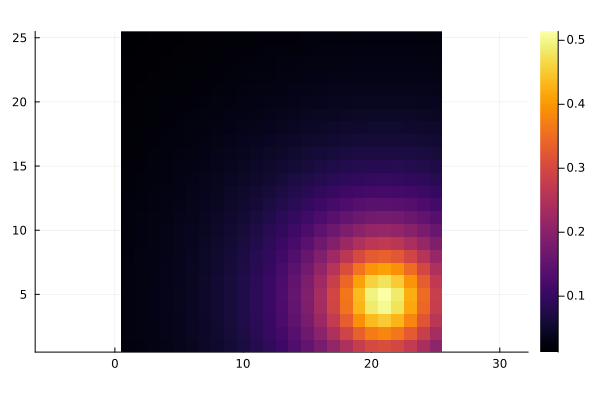

In [282]:
ek = zeros(10)
k = 10
ek[k] = 1
plotlamps(ek, clim = nothing)


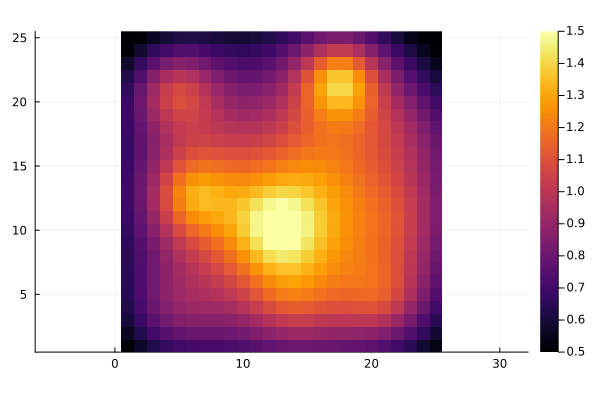

In [271]:
plotlamps( ones(10) )

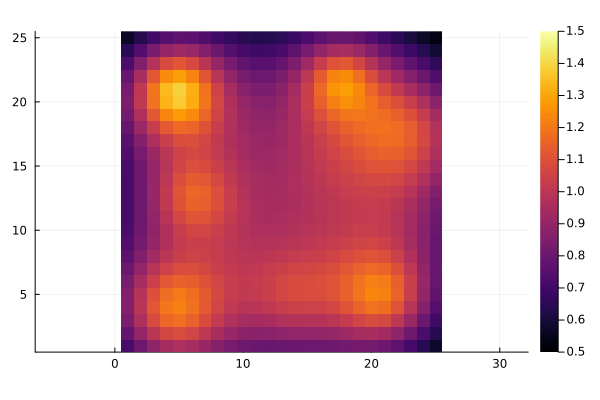

In [272]:
b = ones(n*n)
levels = A \ b
plotlamps(levels)

In [274]:
levels

10-element Vector{Float64}:
 1.5787088009113972
 0.7502092914318518
 2.3291442343784787
 0.7515768087737179
 0.00568771157161873
 0.5752076144145525
 0.36492886840345773
 2.0386780661987745
 0.928414812562683
 1.4201205406348854

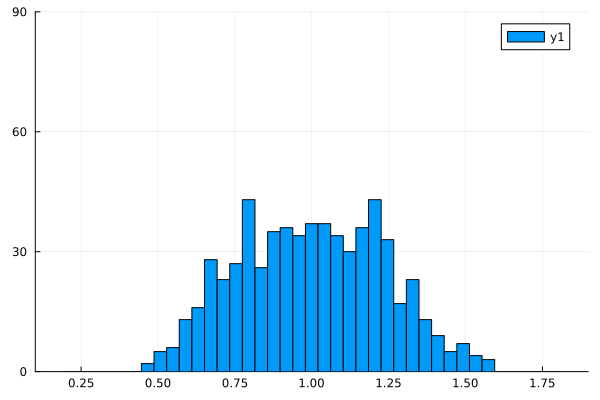

In [275]:
Plots.histogram( A*ones(10), bins=range(0.2, 1.8, 40), ylim=(0,90) )

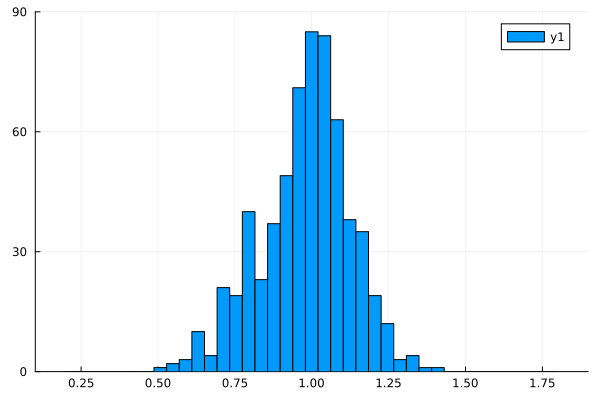

In [276]:
Plots.histogram(A*levels, bins=range(0.2, 1.8, 40), ylim=(0,90) )

In [260]:
c

LoadError: UndefVarError: `c` not defined